## Project

***

The task of this project is to create a we service that uses machine learning to make predictions based on the data set powerproduction.csv 

The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. The web service should respond with predicted power values based on speed values sent as HTTP requests. 

In [1]:
# Numerical arrays
import numpy as np

# read a csv file and organise our data
import pandas as pd

# Machine Learning - KMeans
#from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.neural_network as sknn
#import sklearn.cluster as skcl

# Plotting & visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# Read the iris.csv from a file
df = pd.read_csv('powerproduction.csv')

# checking the first 5 records of the dataset:
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
# removing all rows where the power data is not maintained (equals 0.0)
df = df[df['power'] !=0]

In [5]:
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [6]:
X = df.iloc[:, 0].values 
Y = df.iloc[:, 1].values

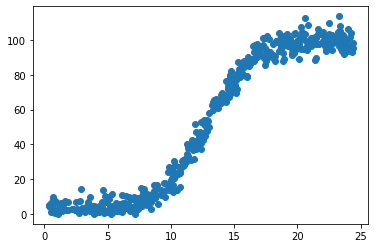

In [7]:
plt.scatter(X, Y, cmap='gist_rainbow')

### Neural Network

In [11]:
#Train the neiral network
regr = sknn.MLPRegressor(max_iter=10000).fit(df, Y)

#show predictions
np.array([Y, regr.predict(df)]).T

array([[4.33100000e+00, 4.22989709e+00],
       [5.18600000e+00, 5.03661246e+00],
       [3.82600000e+00, 3.84994549e+00],
       [1.04800000e+00, 1.10119769e+00],
       [5.55300000e+00, 5.44887458e+00],
       [6.49800000e+00, 6.29774610e+00],
       [5.24100000e+00, 5.20393876e+00],
       [4.22000000e+00, 4.29230050e+00],
       [7.97400000e+00, 7.68402173e+00],
       [9.74600000e+00, 9.24899044e+00],
       [7.27100000e+00, 7.15383028e+00],
       [7.95000000e-01, 8.41072416e-01],
       [7.35000000e+00, 7.25855564e+00],
       [1.99600000e+00, 2.06958798e+00],
       [1.60900000e+00, 1.67181710e+00],
       [2.06400000e+00, 2.13914525e+00],
       [6.51100000e+00, 6.58353815e+00],
       [2.08500000e+00, 2.15970376e+00],
       [1.21000000e-01, 7.51527042e-02],
       [1.20800000e+00, 1.26387660e+00],
       [3.37300000e+00, 3.48833108e+00],
       [6.51000000e+00, 6.64931307e+00],
       [4.15600000e+00, 4.29468439e+00],
       [2.00500000e+00, 2.06888759e+00],
       [5.352000

In [12]:
# The score
regr.score(df, Y)

0.9999891180339914